### Retention rate
Сustomer retention. Отток клиентов на примере telecom датасета В разных областях конкретный метод подсчета может отличаться, но это всегда число, которое показывает насколько хорошо мы удерживаем клиента. 
### Основная задача предстказать отточных клиентов и две дополнительные задачи:
* Можно ли отделить потенциально отточных пользователей по их признакам в метрическом пространстве не зная кто из действительно отточный?
* Есть ли еще какие-то группы пользователей, которые могут влиять на отток или может быть ему предшествовать?

1. Бейзлайн(KNN KMeans DBSCAN)
2. EDA
3. Понижение размерности(PCA визуализация) и KNN KMeans DBSCAN(на CPU)
4. Подбор гиперпараметров (Grid Search)
5. Визуализация T-SNE(на CPU parameters=2)
6. Понижение размерности T-SNE и KNN KMeans DBSCAN(на CPU TSNE parameters=2)
7. Подбор гиперпараметров на CPU KNN(TSNE parameters=3)
8. Подбор гиперпараметров на GPU KNN(TSNE parameters=2)

## Бейзлайн без обработки.

In [1]:
# Скачаем наш датасет
!wget https://www.dropbox.com/s/ofr99e7skcd515m/telecom_churn.csv


--2023-11-07 11:54:20--  https://www.dropbox.com/s/ofr99e7skcd515m/telecom_churn.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/ofr99e7skcd515m/telecom_churn.csv [following]
--2023-11-07 11:54:20--  https://www.dropbox.com/s/raw/ofr99e7skcd515m/telecom_churn.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucdbe91208c9cd5856a45cea04f8.dl.dropboxusercontent.com/cd/0/inline/CHGoMoLqp5HVmaewhF6kWInNkSQkPX6Wcsf8inkHwTJGumUWL774-k1z1mGXfZHoATBvtGaxv5LkAJgEuK5JBDXAHveRiJW584-Q-DQfCmmhR4mpPcJnYZzFXbEOYCM818U0GPCCbbDVVaL3BBucY8sM/file# [following]
--2023-11-07 11:54:20--  https://ucdbe91208c9cd5856a45cea04f8.dl.dropboxusercontent.com/cd/0/inline/CHGoMoLqp5HVmaewhF6kWInNkSQkPX6Wcsf8inkHwTJGumUWL774-k1z1mGXfZHoATBvtGaxv5LkAJgEuK5JBDX

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px 

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier


# Считаем наш датасет 
data = pd.read_csv('telecom_churn.csv')
data.sample(10)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Churn  AccountWeeks  ContractRenewal  DataPlan  DataUsage  \
174       0           179                1         0       0.00   
607       0            63                1         1       1.78   
3144      1            35                1         0       0.00   
1808      0            83                1         0       0.00   
2405      1            92                1         1       1.73   
180       0            94                0         1       2.57   
1889      1            91                1         0       0.00   
680       0           116                1         0       0.00   
646       0           153                1         1       4.16   
1656      0           101                1         1       2.89   

      CustServCalls  DayMins  DayCalls  MonthlyCharge  OverageFee  RoamMins  
174               0    219.2        92           50.0        7.47       6.1  
607               1    142.3       107           52.8        5.94       6.6  
3144              5    138.1       115           37.0        7.91      10.3  
1808              3    231.3       100           58.0       10.52      12.4  
2405              1    201.3       130           69.3       10.19       6.4  
180               4    197.1       125           77.7       10.73       9.5  
1889              1    153.0       123           38.0        7.06      10.3  
680               1    189.5        90           49.0        9.49      13.1  
646               0    235.6        74          101.6       11.40      15.4  
1656              1    105.9       132           66.9       11.59      10.7

In [3]:
# Классы
print(f"Размер нулевого класса: {sum(data.Churn == 0)}")
print(f"Размер первого класса:  {sum(data.Churn == 1)}")
print(f"Доля первого класса:   {sum(data.Churn == 1) / len(data.Churn)}")

Размер нулевого класса: 2850
Размер первого класса:  483
Доля первого класса:   0.14491449144914492


In [3]:
# Целевая переменна churn, тестовая и обучающая выбоки

X = data.drop(columns='Churn')
y = data['Churn']
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=12)

X_train

AccountWeeks  ContractRenewal  DataPlan  DataUsage  CustServCalls  \
2046           120                1         0       0.00              1   
747            155                1         0       0.34              1   
180             94                0         1       2.57              4   
2968           160                1         0       0.00              1   
534             67                1         0       0.22              4   
...            ...              ...       ...        ...            ...   
3313           127                1         0       0.00              1   
3325            78                1         0       0.23              2   
1414           182                1         0       0.35              1   
1691            95                1         0       0.00              2   
1867           142                0         1       2.65              0   

      DayMins  DayCalls  MonthlyCharge  OverageFee  RoamMins  
2046    149.2        98           42.0        9.68      11.1  
747     184.6       102           52.4        9.80       7.8  
180     197.1       125           77.7       10.73       9.5  
2968    234.9       136           63.0       13.54      13.9  
534     310.4        97           61.2        3.33       9.2  
...       ...       ...            ...         ...       ...  
3313    102.8       128           30.0        7.19      10.0  
3325    193.4        99           45.3        5.85       9.3  
1414    176.1        90           48.5        8.75       9.7  
1691    269.0       120           66.0       11.69       7.3  
1867    191.1       109           72.5        7.48       9.8  

[2666 rows x 10 columns]

Для классификации используем knn из neighbors библиотеки sklearn.

In [5]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [6]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [7]:
preds_valid = knn.predict(X_valid)
preds_valid

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

### Метрики accuracy(доля верно угаданных объектов),precision(доля верно помеченных объектов класса 1 среди всех помеченных единицей объектов),recall(доля верно помеченных объектов класса 1 среди всех объектов класса 1).


In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print(f'Accuracy  = {accuracy_score(y_valid, preds_valid)}')
print(f'Precision = {precision_score(y_valid, preds_valid)}')
print(f'Recall    = {recall_score(y_valid, preds_valid)}')

Accuracy  = 0.8860569715142429
Precision = 0.717948717948718
Recall    = 0.3010752688172043



Вывод: Верно получены 90% обьектов(обоих классов), однако:
* Среди тех, для кого мы предсказали 1 (т.е. решили, что они уйдут), всего лишь чуть больше двух третей действительно собиралась уйти;
* Среди тех, кто действительно ушел, мы нашли только 30%. 

### Вспомогательные задачи:
Можно ли отделить потенциально отточных пользователей ?Есть ли еще какие-то группы пользователей, которые могут влиять на отток?

### Будем использовать кластеризацию`k-means` что бы выделить отточных клиентов и метод `DBSCAN` что бы выяснить количнство кластеров. 

In [9]:

from sklearn.cluster import KMeans, DBSCAN
# Объект класса k-means с числом кластеров = 2.Объект класса DBSCAN по умолчанию
kmeans = KMeans(n_clusters=2, random_state=0)
dbscan = DBSCAN()

kmeans.fit(X_train)
dbscan.fit(X_train)

y_kmeans = kmeans.predict(X_train)
y_dbscan = dbscan.labels_

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [10]:
print(f"Элементов в нулевом кластере: {len(y_kmeans[y_kmeans == 0])}, в первом: {len(y_kmeans[y_kmeans == 1])}")

Элементов в нулевом кластере: 1299, в первом: 1367


In [11]:
# Смотрим в каком кластере какой процент класса 1 содержится
print(f"В нулевом кластере находится {len(y_train[(y_kmeans == 0) & (y_train == 1)]) / len(y_train[y_train == 1])} от класса 1")
print(f"В первом кластере находится  {len(y_train[(y_kmeans == 1) & (y_train == 1)]) / len(y_train[y_train == 1])} от класса 1")

В нулевом кластере находится 0.6025641025641025 от класса 1
В первом кластере находится  0.3974358974358974 от класса 1


Вывод: Сделать однозначного вывода не удается, хоть в одном кластере на 50% больше отточников. Получившиеся два кластера достаточно слабо отличаются с точки зрения содержания отточных абонентов.
Необходимо EDA

In [12]:
# DBSCAN  (-1 выдается на обьекты выбросы)
# Число уникальных кластеров
print(f"Число кластеров: {np.unique(y_dbscan)}")

Число кластеров: [-1]


DBSCAN соединил все данные в один кластер.В цикле переберем значения eps от 0.001 до 0.5 и будем выводить то значение параметра, при котором у нас  оказалось больше 1 кластера. Таких вариантов нет, нужно EDA.

In [13]:
for eps in np.linspace(0.001, 0.5, 50): #Множество равно удаленных точек между заданными границами
    dbscan = DBSCAN(eps = eps)
    dbscan.fit(X_train)
    y_dbscan = dbscan.labels_
    if len(np.unique(y_dbscan)) - 1 > 1:
      print(eps, len(np.unique(y_dbscan)) - 1)

## EDA

In [14]:
data

Churn  AccountWeeks  ContractRenewal  DataPlan  DataUsage  \
0         0           128                1         1       2.70   
1         0           107                1         1       3.70   
2         0           137                1         0       0.00   
3         0            84                0         0       0.00   
4         0            75                0         0       0.00   
...     ...           ...              ...       ...        ...   
3328      0           192                1         1       2.67   
3329      0            68                1         0       0.34   
3330      0            28                1         0       0.00   
3331      0           184                0         0       0.00   
3332      0            74                1         1       3.70   

      CustServCalls  DayMins  DayCalls  MonthlyCharge  OverageFee  RoamMins  
0                 1    265.1       110           89.0        9.87      10.0  
1                 1    161.6       123           82.0        9.78      13.7  
2                 0    243.4       114           52.0        6.06      12.2  
3                 2    299.4        71           57.0        3.10       6.6  
4                 3    166.7       113           41.0        7.42      10.1  
...             ...      ...       ...            ...         ...       ...  
3328              2    156.2        77           71.7       10.78       9.9  
3329              3    231.1        57           56.4        7.67       9.6  
3330              2    180.8       109           56.0       14.44      14.1  
3331              2    213.8       105           50.0        7.98       5.0  
3332              0    234.4       113          100.0       13.30      13.7  

[3333 rows x 11 columns]

In [15]:
is_missing = data.isna()
is_missing.sum()

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

Nan,пропуски,статистика

In [16]:
X = data.drop(columns='Churn')
X.describe()

AccountWeeks  ContractRenewal     DataPlan    DataUsage  CustServCalls  \
count   3333.000000      3333.000000  3333.000000  3333.000000    3333.000000   
mean     101.064806         0.903090     0.276628     0.816475       1.562856   
std       39.822106         0.295879     0.447398     1.272668       1.315491   
min        1.000000         0.000000     0.000000     0.000000       0.000000   
25%       74.000000         1.000000     0.000000     0.000000       1.000000   
50%      101.000000         1.000000     0.000000     0.000000       1.000000   
75%      127.000000         1.000000     1.000000     1.780000       2.000000   
max      243.000000         1.000000     1.000000     5.400000       9.000000   

           DayMins     DayCalls  MonthlyCharge   OverageFee     RoamMins  
count  3333.000000  3333.000000    3333.000000  3333.000000  3333.000000  
mean    179.775098   100.435644      56.305161    10.051488    10.237294  
std      54.467389    20.069084      16.426032     2.535712     2.791840  
min       0.000000     0.000000      14.000000     0.000000     0.000000  
25%     143.700000    87.000000      45.000000     8.330000     8.500000  
50%     179.400000   101.000000      53.500000    10.070000    10.300000  
75%     216.400000   114.000000      66.200000    11.770000    12.100000  
max     350.800000   165.000000     111.300000    18.190000    20.000000

In [18]:
# Число уникальных значений в колонке ContractRenewal
#data['ContractRenewal'].value_counts()

### Числовые признаки:
* Гистограммы признаков
* Корреляции разных переменных
* Попарные графики

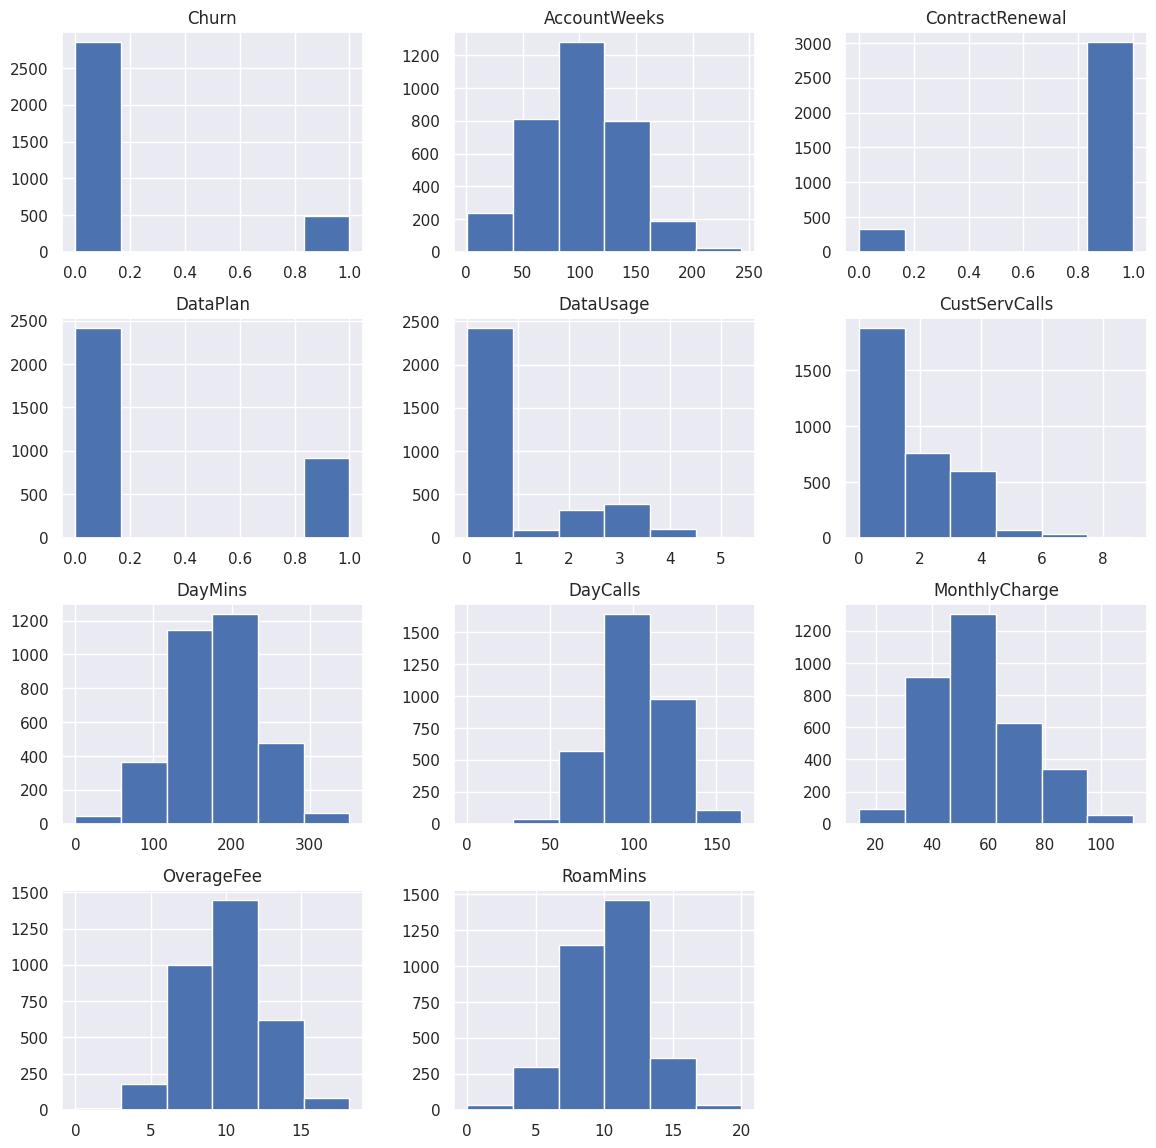

In [17]:
import seaborn as sns


# Улучшатор стилей в matplotlib
sns.set()

# 6 Бинов
data.hist(bins=6, figsize=(14,14));

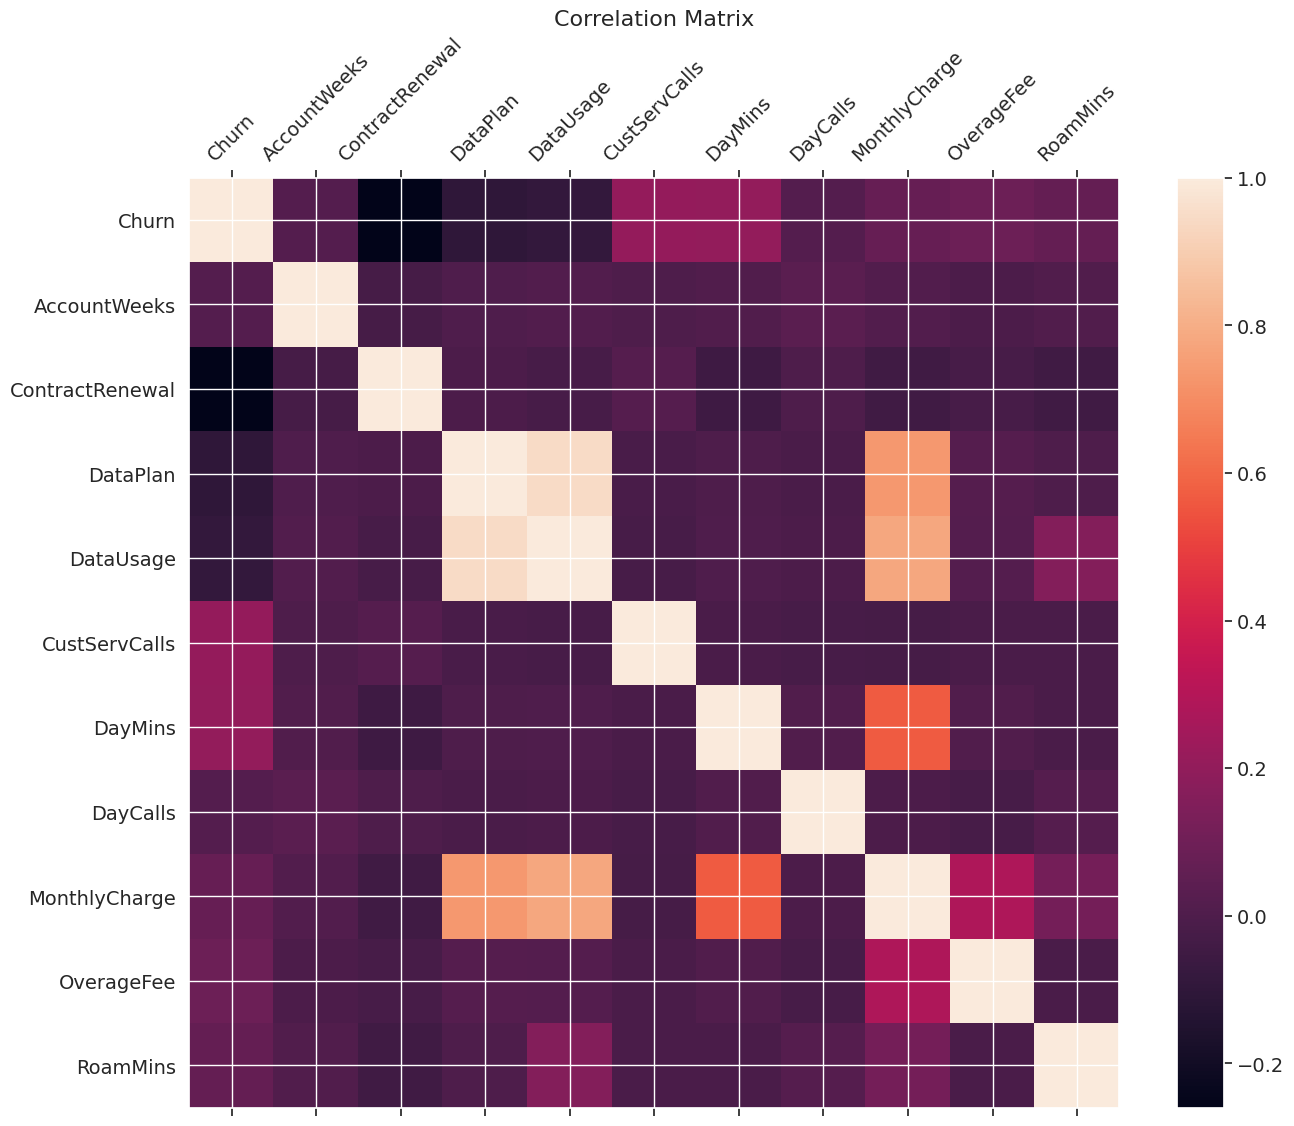

In [18]:
f = plt.figure(figsize=(15, 12))
plt.matshow(data.corr(), fignum=f.number)
plt.xticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


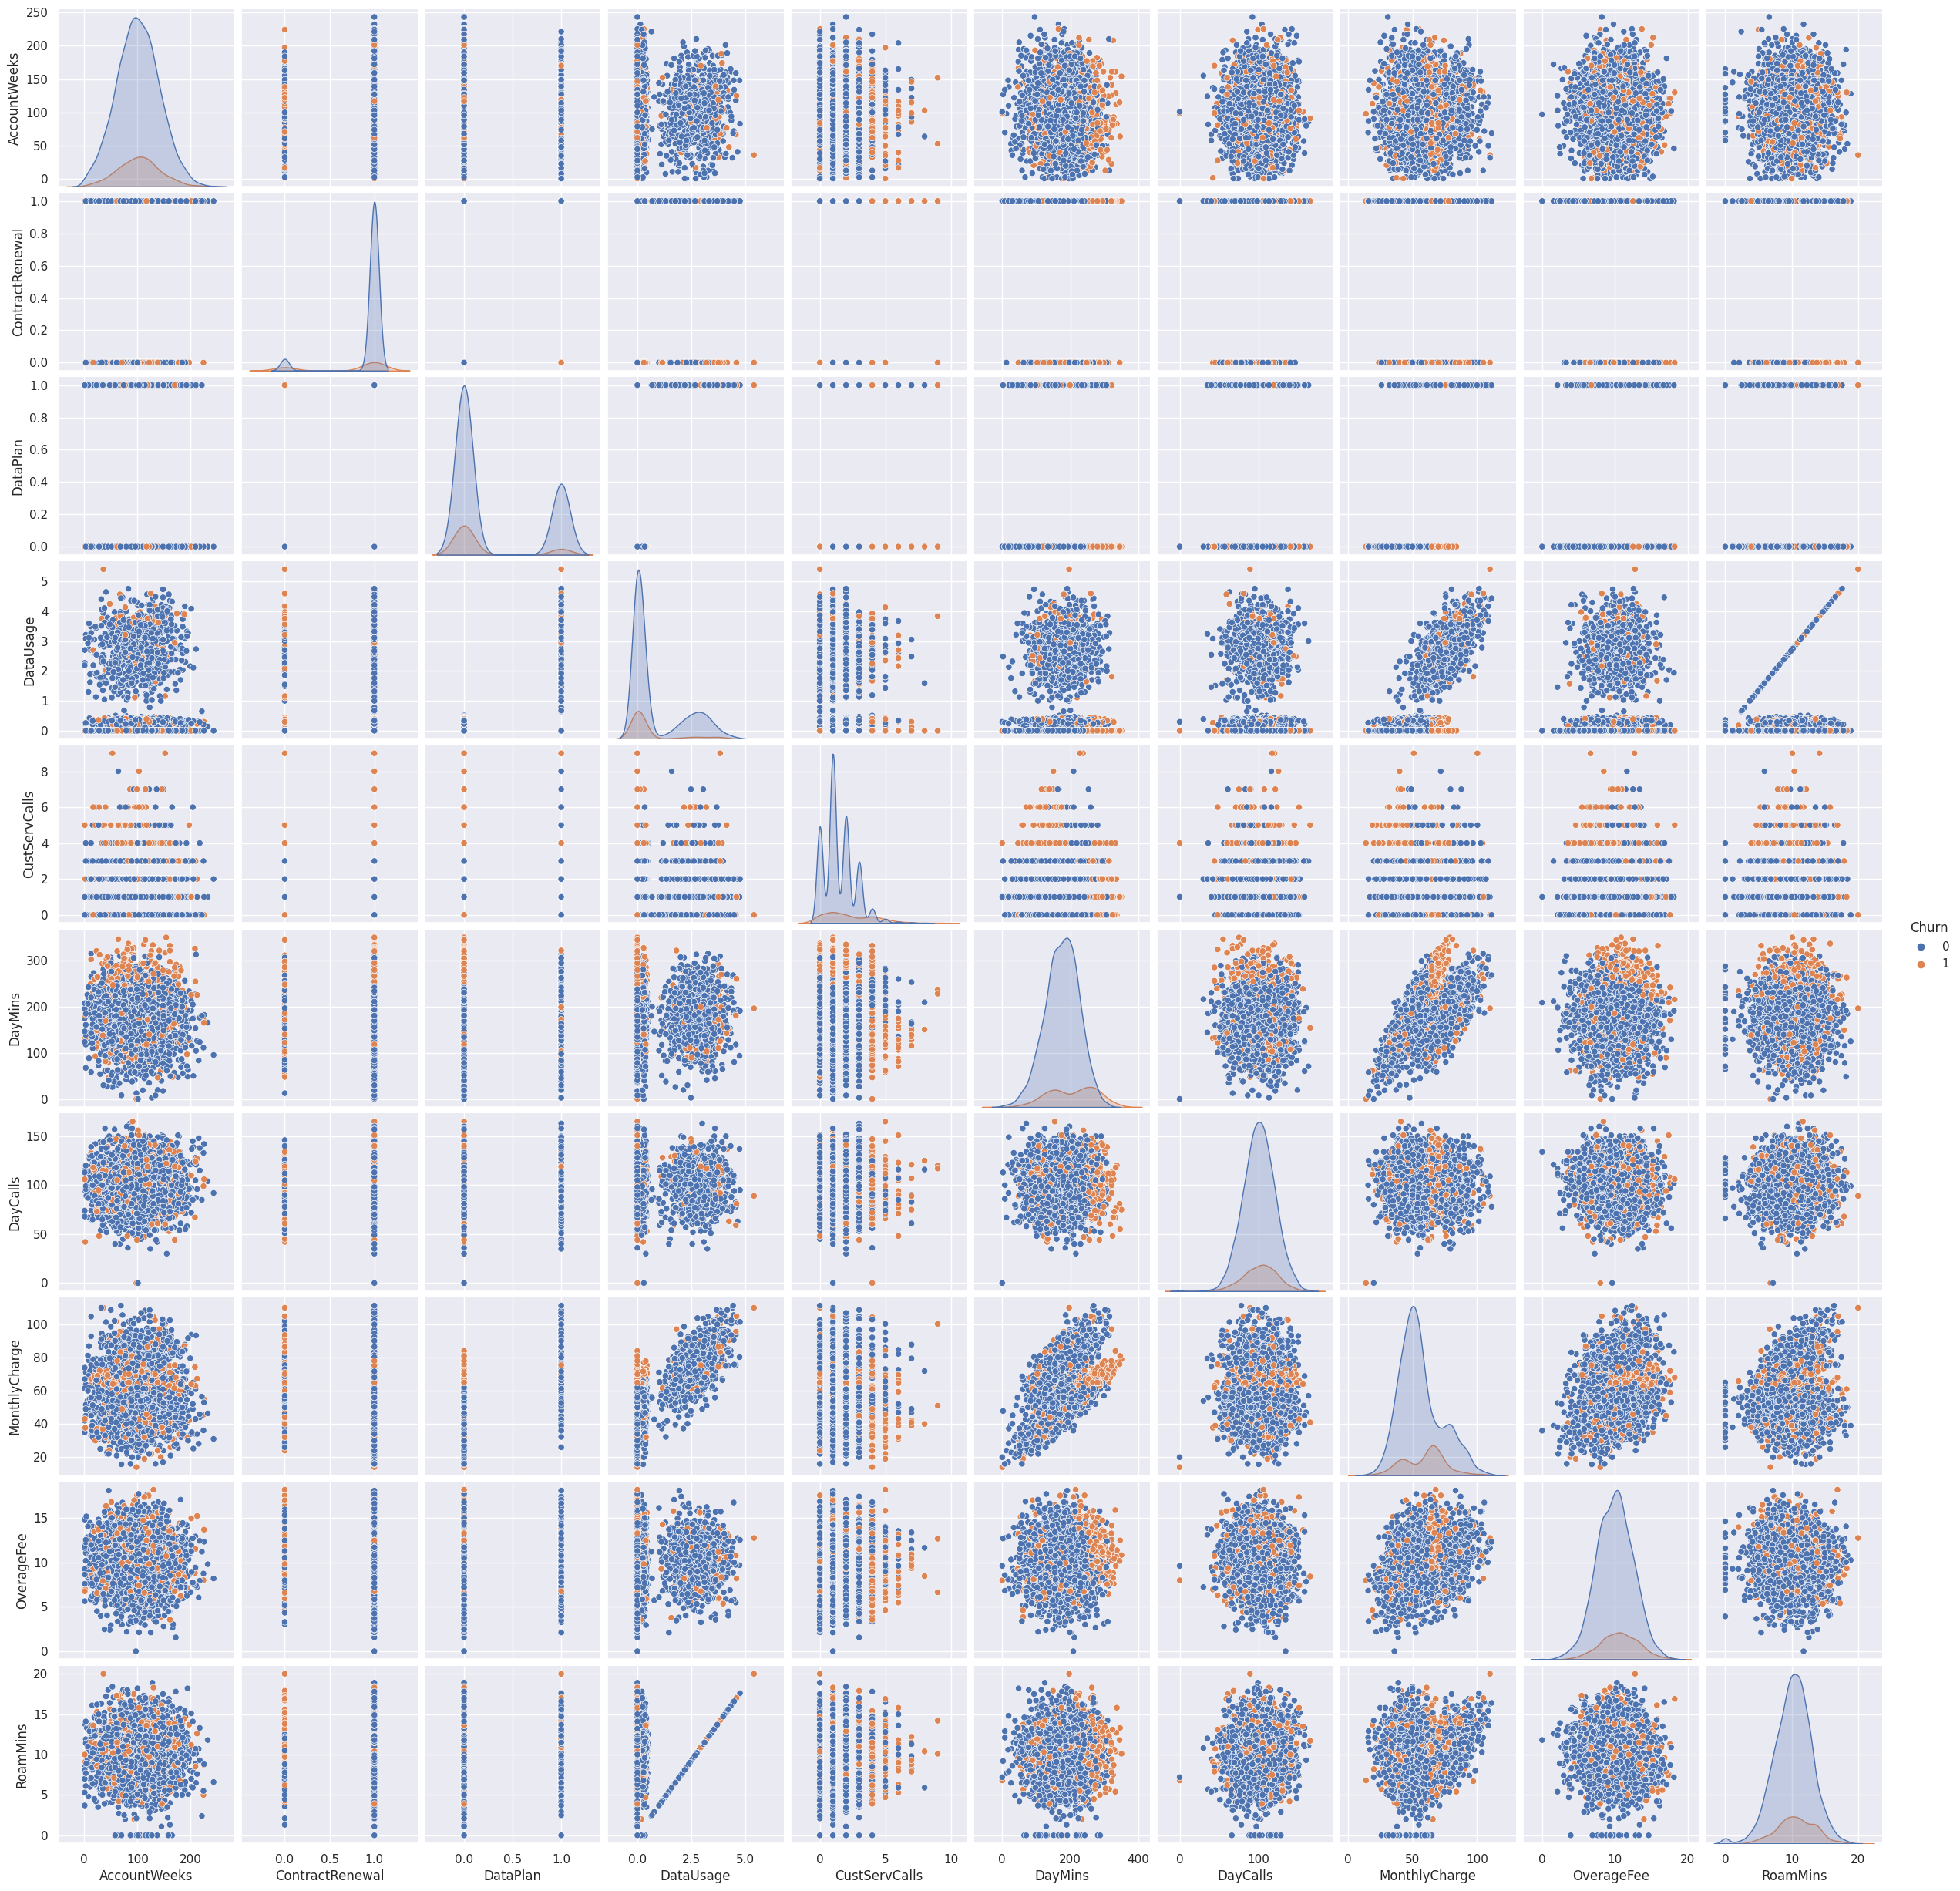

In [21]:
# Парные корреляц
sns.pairplot(data, hue='Churn')

На графике совместного распределения CustServCalls и DayMin видны 2 группы:
1. Те, кто мало разговаривают (DayMins маленький), но много звонят в CustomerService
2. Те, кто много разговаривают (DayMins маленький), но мало звонят в CustomerService

### * Стандартизация признаков.
### * Снижение размерности (PCA - Principal Component Analysis).
### * Подбор метрик, гиперпараметров и k neighbors (GridSearch числа компонент). 
### * Кластеризация.
##

In [19]:
# Повторим пайплайн.
data = pd.read_csv('telecom_churn.csv')
X = data.drop(columns='Churn')
y = data['Churn']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=12, stratify=y)

Стандартизируем(нормируем признаки) StandartScaler x_n=(x-mean)/std 

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train, y_train)

StandardScaler()

In [21]:
# Применим обученый scaler
X_train_normed = scaler.transform(X_train)
X_valid_normed = scaler.transform(X_valid)

In [22]:
# Размер исходных признаков
X_train.shape

(2666, 10)

## PCA(Визуализация и уменьшение размерности)

In [39]:
# Создаем PCA и обучаем его на нормализованном трейне
pca = PCA(n_components = 2)
pca.fit(X_train_normed, y_train)

# Применяем трансформации
X_train_normed = scaler.transform(X_train)
X_train_pca = pca.transform(X_train_normed) 
#Создаем новый DataFrame для визуализации
pca_df = pd.DataFrame(data=X_train_pca, columns=['Dimension 1', 'Dimension 2'])
pca_df['Churn'] = y_train.replace({0: 'blue', 1: 'red'})

# Визуализация с использованием matplotlib
plt.figure(figsize=(10, 8))
fig=px.scatter(pca_df,x='Dimension 1', y='Dimension 2', color='Churn')
fig.show()

<Figure size 1000x800 with 0 Axes>

In [37]:
# Объект класса PCA (главных компонент 7)
pca = PCA(n_components = 7)
# PCA на нормированных признаках
pca.fit(X_train_normed, y_train)

PCA(n_components=7)

In [38]:
# Преобразование
X_train_pca = pca.transform(X_train_normed)
X_valid_pca = pca.transform(X_valid_normed)

### Модель

In [39]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_pca, y_train)
preds_valid = knn.predict(X_valid_pca)

# Тестирование
print(f'Accuracy  = {accuracy_score(y_valid, preds_valid)}')
print(f'Precision = {precision_score(y_valid, preds_valid)}')
print(f'Recall    = {recall_score(y_valid, preds_valid)}')

Accuracy  = 0.896551724137931
Precision = 0.7592592592592593
Recall    = 0.422680412371134


### Обе метрики (precision и recall) улучшились.
### Подбор гиперпараметров.

In [40]:
precisions = []
recalls = []

# Двойной цикл по числу компонент и числу соседей повторим пайплайн
for pca_components in [10, 9, 8, 7, 6, 5]:
    for k_neighbors in [1, 2, 3, 4, 5 ,6, 7]:
        scaler = StandardScaler()
        scaler.fit(X_train, y_train)
        X_train_normed = scaler.transform(X_train)
        X_valid_normed = scaler.transform(X_valid)

        pca = PCA(pca_components)
        pca.fit(X_train_normed, y_train)

        X_train_pca = pca.transform(X_train_normed)
        X_valid_pca = pca.transform(X_valid_normed)

        # Модель
        knn = KNeighborsClassifier(n_neighbors=k_neighbors)
        knn.fit(X_train_pca, y_train)
        preds_valid = knn.predict(X_valid_pca)

        # Тестирование
        print(f'Hyper parameters: pca_components={pca_components}, k_neighbors={k_neighbors}')
        print(f'Accuracy  = {accuracy_score(y_valid, preds_valid)}')
        precisions.append(precision_score(y_valid, preds_valid))
        print(f'Precision = {precisions[-1]}')
        recalls.append(recall_score(y_valid, preds_valid))
        print(f'Recall    = {recalls[-1]}')
        print()

Hyper parameters: pca_components=10, k_neighbors=1
Accuracy  = 0.8650674662668666
Precision = 0.5346534653465347
Recall    = 0.5567010309278351

Hyper parameters: pca_components=10, k_neighbors=2
Accuracy  = 0.8830584707646177
Precision = 0.7111111111111111
Recall    = 0.32989690721649484

Hyper parameters: pca_components=10, k_neighbors=3
Accuracy  = 0.8935532233883059
Precision = 0.6911764705882353
Recall    = 0.4845360824742268

Hyper parameters: pca_components=10, k_neighbors=4
Accuracy  = 0.8875562218890555
Precision = 0.75
Recall    = 0.3402061855670103

Hyper parameters: pca_components=10, k_neighbors=5
Accuracy  = 0.896551724137931
Precision = 0.7413793103448276
Recall    = 0.44329896907216493

Hyper parameters: pca_components=10, k_neighbors=6
Accuracy  = 0.8905547226386806
Precision = 0.7857142857142857
Recall    = 0.3402061855670103

Hyper parameters: pca_components=10, k_neighbors=7
Accuracy  = 0.8950524737631185
Precision = 0.7647058823529411
Recall    = 0.4020618556701031

## Метрики при разных параметрах.

Text(0.5, 1.0, 'Метрики моделей')

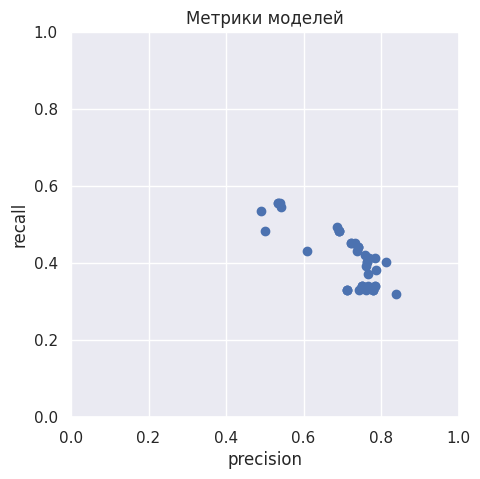

In [41]:
plt.figure(figsize=(5, 5))

# Отрисуем метрики на графике scatter
plt.scatter(precisions, recalls)

plt.xlim((0, 1))
plt.ylim((0, 1))
plt.xlabel('precision')
plt.ylabel('recall')
plt.title('Метрики моделей')

### Выбор лучшего набора параметров диктуется прикладной областью -- тем насколько дорого нам обходится ошибочное признание отточным клиента и насколько дорого обходится пропуск потенциально отточного клиента.

## А теперь вернемся к нашей вспомогательной задаче

Оставим 7 главных компонент и попытаемся решить те же задачи, что и раньше.

In [34]:
# Повторим пайплайн преобразования датастеа data -> scaled data -> PCA data
# Создаем StandardScaler и обучаем его на трейне
scaler = StandardScaler()
scaler.fit(X_train, y_train)

# Создаем PCA и обучаем его на нормализованном трейне
pca = PCA(n_components = 7)
pca.fit(X_train_normed, y_train)

# Применяем трансформации
X_train_normed = scaler.transform(X_train)
X_train_pca = pca.transform(X_train_normed)

In [43]:
# Создадим объект класса k-means с числом кластеров, равным 2, а объект класса DBSCAN c параметрами по умолчанию
kmeans = KMeans(n_clusters=2, random_state=0)
dbscan = DBSCAN()

# Обучим их на обучающем датасете
kmeans.fit(X_train_pca)
dbscan.fit(X_train_pca)

# И сделаем предсказание на нем же 
y_kmeans = kmeans.predict(X_train_pca)
y_dbscan = dbscan.labels_

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [44]:
# Посмотрим на ответ kmeans: На то, сколько у нас элементов кластера 0 и сколько элементов кластера 1
print(f"Элементов в нулевом кластере: {len(y_kmeans[y_kmeans == 0])}, в первом: {len(y_kmeans[y_kmeans == 1])}")

Элементов в нулевом кластере: 716, в первом: 1950


In [45]:
# Посмотрим в каком кластере какой процент класса 1 содержиться
print(f"В нулевом кластере находится {len(y_train[(y_kmeans == 0) & (y_train == 1)]) / len(y_train[y_train == 1])} от класса 1")
print(f"В первом кластере находится  {len(y_train[(y_kmeans == 1) & (y_train == 1)]) / len(y_train[y_train == 1])} от класса 1")

В нулевом кластере находится 0.17875647668393782 от класса 1
В первом кластере находится  0.8212435233160622 от класса 1


Видим, что теперь большая часть отточных клиентов сосредоточилась в первом кластере, однако первый кластер почти в 2.5 раза больше первого.

In [46]:
# DBSCAN: количество кластеров(-1 выбросы)

print(f"Число кластеров: {np.unique(y_dbscan)}")

Число кластеров: [-1  0]


Видим, что сейчас DBSCAN не видит структуры в данных, но мы снова попытаемся найти подходящий радиус

In [47]:
# В цикле переберем значения eps от 0.1 до 5 и будем выводить то значение параметра, при котором у нас  оказалось больше 1 кластера
#
for eps in np.linspace(0.1, 5, 50):
    dbscan = DBSCAN(eps = eps)
    dbscan.fit(X_train_pca)
    y_dbscan = dbscan.labels_
    if len(np.unique(y_dbscan)) - 1 > 1:
        print(eps, len(np.unique(y_dbscan))-1)

0.6 3
0.7000000000000001 19
0.8 24
0.9 18
1.0 11
1.1 9
1.2000000000000002 4
1.3000000000000003 3
1.4000000000000001 5
1.5000000000000002 5
1.6 4
1.7000000000000002 3
1.8000000000000003 2


Возьмем эпсилон 1,5

In [56]:
dbscan = DBSCAN(eps = 1.6)
dbscan.fit(X_train_pca)
y_dbscan = dbscan.labels_

In [57]:
# Давайте посмотрим в каком кластере какой процент класса 1 содержиться
print(f"В выбросах ({sum((y_dbscan == -1))}) находится {len(y_train[(y_dbscan == -1) & (y_train == 1)]) / len(y_train[y_train == 1])} от класса 1")
print(f"В нулевом ({sum((y_dbscan == 0))}) кластере находится {len(y_train[(y_dbscan == 0) & (y_train == 1)]) / len(y_train[y_train == 1])} от класса 1")
print(f"В первом ({sum((y_dbscan == 1))}) кластере находится {len(y_train[(y_dbscan == 1) & (y_train == 1)]) / len(y_train[y_train == 1])} от класса 1")
print(f"Во втором ({sum((y_dbscan == 2))}) кластере находится {len(y_train[(y_dbscan == 2) & (y_train == 1)]) / len(y_train[y_train == 1])} от класса 1")
print(f"В третьем ({sum((y_dbscan == 3))}) кластере находится {len(y_train[(y_dbscan == 3) & (y_train == 1)]) / len(y_train[y_train == 1])} от класса 1")
print(f"В четвертом ({sum((y_dbscan == 4))}) кластере находится {len(y_train[(y_dbscan == 4) & (y_train == 1)]) / len(y_train[y_train == 1])} от класса 1")

В выбросах (167) находится 0.16321243523316062 от класса 1
В нулевом (1864) кластере находится 0.7331606217616581 от класса 1
В первом (605) кластере находится 0.07772020725388601 от класса 1
Во втором (19) кластере находится 0.015544041450777202 от класса 1
В третьем (11) кластере находится 0.010362694300518135 от класса 1
В четвертом (0) кластере находится 0.0 от класса 1


### Вывод -- в данных можно выделить структурные кластеры, большую часть отточных клиентов.Воспользуемся методом визуализации данных с понижением размерности, SNE/t-SNE.

In [58]:
import plotly.express as px # для визуализации данных
#import matplotlib.pyplot as plt # для отображения рукописных цифр
from sklearn.manifold import TSNE # для снижения размерности с помощью t-SNE

In [4]:
data = pd.read_csv('telecom_churn.csv')
X = data.drop(columns='Churn')
y = data['Churn']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=12, stratify=y)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train, y_train)
# Применяем трансформации
X_train_normed = scaler.transform(X_train)
X_valid_normed = scaler.transform(X_valid)


In [60]:
# Настройка функции t-SNE.
tsne = TSNE(
    n_components=2, # значение по умолчанию=2. Размерность вложенного пространства.
    #perplexity=10, # значение по умолчанию=30.0. Перплексия связана с количеством ближайших соседей, которое используется в других алгоритмах обучения на множествах.
    #early_exaggeration=12, # значение по умолчанию=12.0. Определяет, насколько плотными будут естественные кластеры исходного пространстве во вложенном пространстве и сколько места будет между ними. 
    #learning_rate=200, # значение по умолчанию=200.0. Скорость обучения для t-SNE обычно находится в диапазоне [10.0, 1000.0]. Если скорость обучения слишком высока, данные могут выглядеть как "шар", в котором любая точка приблизительно равноудалена от ближайших соседей. Если скорость обучения слишком низкая, большинство точек могут быть похожими на сжатое плотное облако с незначительным количеством разбросов. 
    #n_iter=5000, # значение по умолчанию=1000. Максимальное количество итераций для оптимизации. Должно быть не менее 250.
    #n_iter_without_progress=300, # значение по умолчанию=300. Максимальное количество итераций без прогресса перед прекращением оптимизации, используется после 250 начальных итераций с ранним преувеличением.
    #min_grad_norm=0.0000001, # значение по умолчанию=1e-7. Если норма градиента ниже этого порога, оптимизация будет остановлена.
    #metric='euclidean', # значение по умолчанию='euclidean', Метрика, используемая при расчете расстояния между экземплярами в массиве признаков.
    #init='random', #{'random', 'pca'} или ndarray формы (n_samples, n_components), значение по умолчанию='random'. Инициализация вложения.
    #verbose=0, # значение по умолчанию=0. Уровень детализации.
    #random_state=42, # экземпляр RandomState или None, по умолчанию=None. Определяет генератор случайных чисел. Передача int для воспроизводимых результатов при многократном вызове функции.
    #method='barnes_hut', # значение по умолчанию='barnes_hut'. По умолчанию алгоритм вычисления градиента использует аппроксимацию Барнса-Хата, работающую в течение времени O(NlogN). метод='exact' будет работать по более медленному, но точному алгоритму за время O(N^2). Следует использовать точный алгоритм, когда количество ошибок ближайших соседей должно быть ниже 3%.
    #angle=0.5, # значение по умолчанию=0.5. Используется только если метод='barnes_hut' Это компромисс между скоростью и точностью в случае T-SNE с применением алгоритма Барнса-Хата.
    n_jobs=-1, # значение по умолчанию=None. Количество параллельных заданий для поиска соседей. -1 означает использование всех процессоров.
)

# Преобразование X
X_train_tsne = tsne.fit_transform(X_train_normed)
X_valid_tsne = tsne.fit_transform(X_valid_normed)

# Вывод результатов
print('New Shape of X: ', X_train_tsne.shape)
print('Kullback-Leibler divergence after optimization: ', tsne.kl_divergence_)
print('No. of iterations: ', tsne.n_iter_)
#вывод('Embedding vectors: ', embed.embedding_)

New Shape of X:  (2666, 2)
Kullback-Leibler divergence after optimization:  1.012728214263916
No. of iterations:  999


### Kullback-Leibler divergence after optimization:  1.012728214263916

In [42]:

# Создаем новый DataFrame для визуализации
#tsne_df = pd.DataFrame(data=X_train_tsne, columns=['Dimension 1', 'Dimension 2'])
#tsne_df['Churn'] = y_train.replace({'blue': 0, 'red': 1})
# Визуализация с использованием matplotlib
#plt.figure(figsize=(10, 8))
#colors = {0: 'blue', 1: 'red'}  # Определение цветов для классов
#plt.scatter(tsne_df['Dimension 1'], tsne_df['Dimension 2'], c=tsne_df['Churn'].map(colors))
#plt.title('t-SNE Visualization')
#plt.show()

In [61]:

# Создаем новый DataFrame для визуализации
tsne_df = pd.DataFrame(data=X_train_tsne, columns=['Dimension 1', 'Dimension 2'])
tsne_df['Churn'] = y_train.replace({0: 'blue', 1: 'red'})

# Визуализация с использованием matplotlib
#plt.figure(figsize=(10, 8))
fig=px.scatter(tsne_df,x='Dimension 1', y='Dimension 2', color='Churn')#, cmap='coolwarm')

# Изменение цвета фона графика
fig.update_layout(dict(plot_bgcolor = 'white'))

# Обновление линий осей
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

# Установка названия рисунка
fig.update_layout(title_text="t-SNE")

# Обновление размера маркера
fig.update_traces(marker=dict(size=7))

fig.show()


In [65]:

# Создадим объект класса k-means с числом кластеров, равным 4, а объект класса DBSCAN c параметрами по умолчанию
from sklearn.cluster import KMeans, DBSCAN
kmeans = KMeans(n_clusters=4, random_state=0)
dbscan = DBSCAN()

# Обучим их на обучающем датасете
kmeans.fit(X_train_tsne)
dbscan.fit(X_train_tsne)

# И сделаем предсказание на нем же 
y_kmeans_tsne = kmeans.predict(X_train_tsne)
y_dbscan_tsne = dbscan.labels_
# Давайте посмотрим в каком кластере какой процент класса 1 содержиться
print(f"В нулевом кластере находится {len(y_train[(y_kmeans_tsne == 0) & (y_train == 1)]) / len(y_train[y_train == 1])} от класса 1")
print(f"В первом кластере находится  {len(y_train[(y_kmeans_tsne == 1) & (y_train == 1)]) / len(y_train[y_train == 1])} от класса 1")
print(f"Во втором кластере находится  {len(y_train[(y_kmeans_tsne == 2) & (y_train == 1)]) / len(y_train[y_train == 1])} от класса 1")
print(f"В третьем кластере находится  {len(y_train[(y_kmeans_tsne == 3) & (y_train == 1)]) / len(y_train[y_train == 1])} от класса 1")
#print(f"В четвертом кластере находится  {len(y_train[(y_kmeans_tsne == 4) & (y_train == 1)]) / len(y_train[y_train == 1])} от класса 1")

В нулевом кластере находится 0.22020725388601037 от класса 1
В первом кластере находится  0.10621761658031088 от класса 1
Во втором кластере находится  0.3911917098445596 от класса 1
В третьем кластере находится  0.2823834196891192 от класса 1


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [45]:
#y=X_train_tsne[:,1]
#color=y.astype(str)
#color.shape

In [66]:
print(f"Число кластеров: {np.unique(y_dbscan_tsne)}")

Число кластеров: [-1]


In [67]:
for eps in np.linspace(0.1, 5, 50):
    dbscan = DBSCAN(eps = eps)
    dbscan.fit(X_train_tsne)
    y_dbscan_tsne = dbscan.labels_
    if len(np.unique(y_dbscan_tsne)) - 1 > 1:
        print(eps, len(np.unique(y_dbscan_tsne))-1)

0.7000000000000001 13
0.8 38
0.9 77
1.0 119
1.1 159
1.2000000000000002 177
1.3000000000000003 184
1.4000000000000001 177
1.5000000000000002 152
1.6 126
1.7000000000000002 92
1.8000000000000003 67
1.9000000000000001 43
2.0 25
2.1 19
2.2 13
2.3000000000000003 8
2.4000000000000004 8
2.5000000000000004 8
2.6 6
2.7 6
2.8000000000000003 5
2.9000000000000004 5
3.0000000000000004 5
3.1 5
3.2 5
3.3000000000000003 4
3.4000000000000004 4
3.5000000000000004 3
3.6 3
3.7 3
3.8000000000000003 3
3.9000000000000004 3
4.0 3
4.1 3
4.2 3
4.3 3
4.3999999999999995 3
4.5 3
4.6 3
4.7 3
4.8 3
4.9 3
5.0 3


In [68]:
dbscan = DBSCAN(eps = 4.6)
dbscan.fit(X_train_tsne)
y_dbscan = dbscan.labels_

In [74]:
print(f"Число кластеров: {np.unique(y_dbscan)}")

Число кластеров: [0 1 2 3]


In [50]:
X_train_tsne.shape

(2666, 2)

In [75]:
print(f"В выбросах ({sum((y_dbscan == -1))}) находится {len(y_train[(y_dbscan == -1) & (y_train == 1)]) / len(y_train[y_train == 1])} от класса 1")
print(f"В нулевом ({sum((y_dbscan == 0))}) кластере находится {len(y_train[(y_dbscan == 0) & (y_train == 1)]) / len(y_train[y_train == 1])} от класса 1")
print(f"В первом ({sum((y_dbscan == 1))}) кластере находится {len(y_train[(y_dbscan == 1) & (y_train == 1)]) / len(y_train[y_train == 1])} от класса 1")
print(f"Во втором ({sum((y_dbscan == 2))}) кластере находится {len(y_train[(y_dbscan == 2) & (y_train == 1)]) / len(y_train[y_train == 1])} от класса 1")
print(f"В третьем ({sum((y_dbscan == 3))}) кластере находится {len(y_train[(y_dbscan == 3) & (y_train == 1)]) / len(y_train[y_train == 1])} от класса 1")
print(f"В четвертом ({sum((y_dbscan == 4))}) кластере находится {len(y_train[(y_dbscan == 4) & (y_train == 1)]) / len(y_train[y_train == 1])} от класса 1")

В выбросах (0) находится 0.0 от класса 1
В нулевом (1756) кластере находится 0.6113989637305699 от класса 1
В первом (182) кластере находится 0.20984455958549222 от класса 1
Во втором (656) кластере находится 0.10621761658031088 от класса 1
В третьем (72) кластере находится 0.07253886010362694 от класса 1
В четвертом (0) кластере находится 0.0 от класса 1


## TSNE paramets = 3 Подбор параметров для KNN(на CPU).

In [80]:
tsne = TSNE(n_components=3,n_jobs=-1)
X_train_tsne = tsne.fit_transform(X_train_normed)
X_valid_tsne = tsne.fit_transform(X_valid_normed)

# Вывод результатов
print('New Shape of X: ', X_train_tsne.shape)
print('Kullback-Leibler divergence after optimization: ', tsne.kl_divergence_)
print('No. of iterations: ', tsne.n_iter_)
print()

precisions = []
recalls = []

# Двойной цикл по числу компонент и числу соседей повторим пайплайн

for k_neighbors in [1, 2, 3, 4, 5 ,6, 7]:
        # Модель
        knn = KNeighborsClassifier(n_neighbors=k_neighbors)
        knn.fit(X_train_tsne, y_train)
        preds_valid = knn.predict(X_valid_tsne)

        # Тестирование
        print(f'Hyper parameters: tsne_components={3}, k_neighbors={k_neighbors}')
        print(f'Accuracy  = {accuracy_score(y_valid, preds_valid)}')
        precisions.append(precision_score(y_valid, preds_valid))
        print(f'Precision = {precisions[-1]}')
        recalls.append(recall_score(y_valid, preds_valid))
        print(f'Recall    = {recalls[-1]}')
        print()

New Shape of X:  (2666, 3)
Kullback-Leibler divergence after optimization:  0.8489280343055725
No. of iterations:  999

Hyper parameters: tsne_components=3, k_neighbors=1
Accuracy  = 0.8275862068965517
Precision = 0.36363636363636365
Recall    = 0.24742268041237114

Hyper parameters: tsne_components=3, k_neighbors=2
Accuracy  = 0.8350824587706147
Precision = 0.32432432432432434
Recall    = 0.12371134020618557

Hyper parameters: tsne_components=3, k_neighbors=3
Accuracy  = 0.8395802098950524
Precision = 0.40384615384615385
Recall    = 0.21649484536082475

Hyper parameters: tsne_components=3, k_neighbors=4
Accuracy  = 0.8620689655172413
Precision = 0.5757575757575758
Recall    = 0.1958762886597938

Hyper parameters: tsne_components=3, k_neighbors=5
Accuracy  = 0.8575712143928036
Precision = 0.525
Recall    = 0.21649484536082475

Hyper parameters: tsne_components=3, k_neighbors=6
Accuracy  = 0.856071964017991
Precision = 0.5142857142857142
Recall    = 0.18556701030927836

Hyper parameters

Kullback-Leibler divergence after optimization:  0.8489280343055725

## TSNE paramets = 2 Подбор параметров для KNN(на GPU).

In [5]:
#!pip install -c rapidsai -c nvidia -c conda-forge \ cuml=21.12 python=3.7


ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'rapidsai'


In [7]:
!conda install -c rapidsai -c nvidia -c conda-forge cuml=21.12 python=3.7

Retrieving notices: ...working... done
Solving environment: / ^C
- 

In [8]:
# Импортируем библиотеки из RAPIDS
import cuml
from cuml.neighbors import KNeighborsClassifier
from cuml.manifold import TSNE

In [42]:
precisions=[]
recalls=[]
# Двойной цикл по числу компонент и числу соседей повторим пайплайн
for tsne_components in [2]:
    for k_neighbors in [1, 2, 4, 5, 7]:
        scaler = StandardScaler()
        scaler.fit(X_train, y_train)
        X_train_normed = scaler.transform(X_train)
        X_valid_normed = scaler.transform(X_valid)

        tsne = TSNE(
            n_components=tsne_components, # значение по умолчанию=2. Размерность вложенного пространства.
           # perplexity=10, # значение по умолчанию=30.0. Перплексия связана с количеством ближайших соседей, которое используется в других алгоритмах обучения на множествах.
           # early_exaggeration=12, # значение по умолчанию=12.0. Определяет, насколько плотными будут естественные кластеры исходного пространстве во вложенном пространстве и сколько места будет между ними. 
           # learning_rate=200, # значение по умолчанию=200.0. Скорость обучения для t-SNE обычно находится в диапазоне [10.0, 1000.0]. Если скорость обучения слишком высока, данные могут выглядеть как "шар", в котором любая точка приблизительно равноудалена от ближайших соседей. Если скорость обучения слишком низкая, большинство точек могут быть похожими на сжатое плотное облако с незначительным количеством разбросов. 
           # n_iter=5000, # значение по умолчанию=1000. Максимальное количество итераций для оптимизации. Должно быть не менее 250.
           # n_iter_without_progress=300, # значение по умолчанию=300. Максимальное количество итераций без прогресса перед прекращением оптимизации, используется после 250 начальных итераций с ранним преувеличением.
           # min_grad_norm=0.0000001, # значение по умолчанию=1e-7. Если норма градиента ниже этого порога, оптимизация будет остановлена.
           # metric='euclidean', # значение по умолчанию='euclidean', Метрика, используемая при расчете расстояния между экземплярами в массиве признаков.
           # init='random', #{'random', 'pca'} или ndarray формы (n_samples, n_components), значение по умолчанию='random'. Инициализация вложения.
           # verbose=0, # значение по умолчанию=0. Уровень детализации.
           # random_state=42, # экземпляр RandomState или None, по умолчанию=None. Определяет генератор случайных чисел. Передача int для воспроизводимых результатов при многократном вызове функции.
           # method='barnes_hut', # значение по умолчанию='barnes_hut'. По умолчанию алгоритм вычисления градиента использует аппроксимацию Барнса-Хата, работающую в течение времени O(NlogN). метод='exact' будет работать по более медленному, но точному алгоритму за время O(N^2). Следует использовать точный алгоритм, когда количество ошибок ближайших соседей должно быть ниже 3%.
           # angle=0.5#, # значение по умолчанию=0.5. Используется только если метод='barnes_hut' Это компромисс между скоростью и точностью в случае T-SNE с применением алгоритма Барнса-Хата.
           #  n_jobs=-1 # значение по умолчанию=None. Количество параллельных заданий для поиска соседей. -1 означает использование всех процессоров.
                   )
        
        tsne.fit(X_train_normed)#, y_train)

        X_train_tsne = tsne.fit_transform(X_train_normed)
        X_valid_tsne = tsne.fit_transform(X_valid_normed)

        # Модель
        knn = KNeighborsClassifier(n_neighbors=k_neighbors)
        knn.fit(X_train_tsne, y_train)
        preds_valid = knn.predict(X_valid_tsne)

        # Тестирование
        print('New Shape of X: ', X_train_tsne.shape)
        print('Kullback-Leibler divergence after optimization: ', tsne.kl_divergence_)
        print(f'Hyper parameters: pca_components={tsne_components}, k_neighbors={k_neighbors}')
        print(f'Accuracy  = {accuracy_score(y_valid, preds_valid)}')
        precisions.append(precision_score(y_valid, preds_valid))
        print(f'Precision = {precisions[-1]}')
        recalls.append(recall_score(y_valid, preds_valid))
        print(f'Recall    = {recalls[-1]}')
        print()

/opt/conda/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning:

Starting from version 22.04, the default method of TSNE is 'fft'.



New Shape of X:  (2666, 2)
Kullback-Leibler divergence after optimization:  0.66754150390625
Hyper parameters: pca_components=2, k_neighbors=1
Accuracy  = 0.8020989505247377
Precision = 0.1568627450980392
Recall    = 0.08247422680412371



/opt/conda/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning:

Starting from version 22.04, the default method of TSNE is 'fft'.



New Shape of X:  (2666, 2)
Kullback-Leibler divergence after optimization:  0.6792144775390625
Hyper parameters: pca_components=2, k_neighbors=2
Accuracy  = 0.808095952023988
Precision = 0.3258426966292135
Recall    = 0.29896907216494845



/opt/conda/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning:

Starting from version 22.04, the default method of TSNE is 'fft'.



New Shape of X:  (2666, 2)
Kullback-Leibler divergence after optimization:  0.6737844944000244
Hyper parameters: pca_components=2, k_neighbors=4
Accuracy  = 0.808095952023988
Precision = 0.0
Recall    = 0.0



/opt/conda/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning:

Starting from version 22.04, the default method of TSNE is 'fft'.



New Shape of X:  (2666, 2)
Kullback-Leibler divergence after optimization:  0.667937695980072
Hyper parameters: pca_components=2, k_neighbors=5
Accuracy  = 0.808095952023988
Precision = 0.08108108108108109
Recall    = 0.030927835051546393



/opt/conda/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning:

Starting from version 22.04, the default method of TSNE is 'fft'.



New Shape of X:  (2666, 2)
Kullback-Leibler divergence after optimization:  0.7006732225418091
Hyper parameters: pca_components=2, k_neighbors=7
Accuracy  = 0.8065967016491754
Precision = 0.11904761904761904
Recall    = 0.05154639175257732



## Kullback-Leibler divergence after optimization:  0.6675144775390625

Text(0.5, 1.0, 'Метрики моделей')

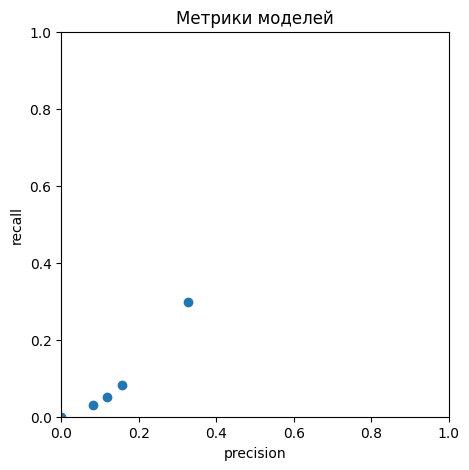

In [43]:
plt.figure(figsize=(5, 5))

# Отрисуем метрики на графике scatter
plt.scatter(precisions, recalls)

plt.xlim((0, 1))
plt.ylim((0, 1))
plt.xlabel('precision')
plt.ylabel('recall')
plt.title('Метрики моделей')

# Вывод: Метод понижения размерности PCA c 7 компанентами дает лучшие результаты для данной задачи чем t-sne с 2-3 компонентами. Качество t-sne с 3 компонентами лучше чем с 2.  